In [4]:
source("https://bioconductor.org/biocLite.R")

package 'BiocInstaller' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trusta\AppData\Local\Temp\RtmpWujgWV\downloaded_packages


Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help


In [5]:
biocLite()

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'Biobase', 'IRanges', 'AnnotationDbi'
also installing the dependencies 'bit', 'bit64', 'blob', 'memoise', 'BiocGenerics', 'S4Vectors', 'RSQLite'



package 'bit' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'BiocGenerics' successfully unpacked and MD5 sums checked
package 'S4Vectors' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'Biobase' successfully unpacked and MD5 sums checked
package 'IRanges' successfully unpacked and MD5 sums checked
package 'AnnotationDbi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trusta\AppData\Local\Temp\RtmpWujgWV\downloaded_packages


Old packages: 'httpuv', 'MASS', 'quantmod', 'survival', 'xts'


In [6]:
biocLite('limma')

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'limma'


package 'limma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trusta\AppData\Local\Temp\RtmpWujgWV\downloaded_packages


Old packages: 'httpuv', 'MASS', 'quantmod', 'survival', 'xts'


In [7]:
biocLite ('DESeq2')

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'DESeq2'
also installing the dependencies 'bitops', 'RCurl', 'GenomeInfoDbData', 'zlibbioc', 'matrixStats', 'lambda.r', 'futile.options', 'XML', 'checkmate', 'GenomeInfoDb', 'XVector', 'DelayedArray', 'futile.logger', 'snow', 'annotate', 'Formula', 'latticeExtra', 'acepack', 'gridExtra', 'htmlTable', 'viridis', 'GenomicRanges', 'SummarizedExperiment', 'BiocParallel', 'genefilter', 'locfit', 'geneplotter', 'Hmisc', 'RcppArmadillo'



package 'bitops' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked
package 'zlibbioc' successfully unpacked and MD5 sums checked
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'lambda.r' successfully unpacked and MD5 sums checked
package 'futile.options' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'GenomeInfoDb' successfully unpacked and MD5 sums checked
package 'XVector' successfully unpacked and MD5 sums checked
package 'DelayedArray' successfully unpacked and MD5 sums checked
package 'futile.logger' successfully unpacked and MD5 sums checked
package 'snow' successfully unpacked and MD5 sums checked
package 'annotate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums check

installing the source package 'GenomeInfoDbData'

Old packages: 'httpuv', 'MASS', 'quantmod', 'survival', 'xts'


In [8]:
biocLite('edgeR')

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'edgeR'


package 'edgeR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trusta\AppData\Local\Temp\RtmpWujgWV\downloaded_packages


Old packages: 'httpuv', 'MASS', 'quantmod', 'survival', 'xts'


In [9]:
library(limma)
library(edgeR)

In [11]:
setwd('./DataFiles/')

In [12]:
# Download the data files from Canvas to your working directory
# This command reads all of the files you downloaded into a DGEList- a type of object defined and used by edgeR that consists of multiple data frames
# Each sample has a single text file 
# The first column of each file is an ID number for a mouse gene, and the third column is the number of reads that aligned to that gene.
files <- dir(pattern="GSM*")
x <- readDGE(files, columns=c(1,3))
str(x)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 2
  .. ..$ :'data.frame':	9 obs. of  4 variables:
  .. .. ..$ files       : chr [1:9] "GSM1545535_10_6_5_11.txt" "GSM1545536_9_6_5_11.txt" "GSM1545538_purep53.txt" "GSM1545539_JMS8-2.txt" ...
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1
  .. .. ..$ lib.size    : num [1:9] 32863052 35335491 57160817 51368625 75795034 ...
  .. .. ..$ norm.factors: num [1:9] 1 1 1 1 1 1 1 1 1
  .. ..$ : num [1:27179, 1:9] 1 0 0 0 1 431 768 4 810 452 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ Tags   : chr [1:27179] "497097" "100503874" "100038431" "19888" ...
  .. .. .. ..$ Samples: chr [1:9] "GSM1545535_10_6_5_11" "GSM1545536_9_6_5_11" "GSM1545538_purep53" "GSM1545539_JMS8-2" ...


In [13]:
## ----Annotate the Samples-----------------------------------------------------
# The DGEList is not complete.  We want to fill it with information about the samples and genes (metadata)
x$samples
colnames(x)
nchar(colnames(x))

,files,group,lib.size,norm.factors
GSM1545535_10_6_5_11,GSM1545535_10_6_5_11.txt,1,32863052,1
GSM1545536_9_6_5_11,GSM1545536_9_6_5_11.txt,1,35335491,1
GSM1545538_purep53,GSM1545538_purep53.txt,1,57160817,1
GSM1545539_JMS8-2,GSM1545539_JMS8-2.txt,1,51368625,1
GSM1545540_JMS8-3,GSM1545540_JMS8-3.txt,1,75795034,1
GSM1545541_JMS8-4,GSM1545541_JMS8-4.txt,1,60517657,1
GSM1545542_JMS8-5,GSM1545542_JMS8-5.txt,1,55086324,1
GSM1545544_JMS9-P7c,GSM1545544_JMS9-P7c.txt,1,21311068,1
GSM1545545_JMS9-P8c,GSM1545545_JMS9-P8c.txt,1,19958838,1


[1] "GSM1545535_10_6_5_11" "GSM1545536_9_6_5_11"  "GSM1545538_purep53"  
[4] "GSM1545539_JMS8-2"    "GSM1545540_JMS8-3"    "GSM1545541_JMS8-4"   
[7] "GSM1545542_JMS8-5"    "GSM1545544_JMS9-P7c"  "GSM1545545_JMS9-P8c"

[1] 20 19 18 17 17 17 17 19 19

In [14]:
# Remove the NCBI GEO ID numbers (GSMXXXXXXX_)
colnames(x) <- substring(colnames(x), 12, nchar(colnames(x)))

In [15]:
#Get the metadata and add it to the DGEList
meta <- read.table("sampleMetadata.txt", sep = "\t", header = TRUE)
meta

SampleID,group,lane
10_6_5_11,LP,L004
9_6_5_11,ML,L004
purep53,Basal,L004
JMS8-2,Basal,L006
JMS8-3,ML,L006
JMS8-4,LP,L006
JMS8-5,Basal,L006
JMS9-P7c,ML,L008
JMS9-P8c,LP,L008


In [16]:
#Note that the table is automatically converted to factors by 'read.table'
group <- meta$group
x$samples$group <- group
lane <- meta$lane
x$samples$lane <- lane
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11,GSM1545535_10_6_5_11.txt,LP,32863052,1,L004
9_6_5_11,GSM1545536_9_6_5_11.txt,ML,35335491,1,L004
purep53,GSM1545538_purep53.txt,Basal,57160817,1,L004
JMS8-2,GSM1545539_JMS8-2.txt,Basal,51368625,1,L006
JMS8-3,GSM1545540_JMS8-3.txt,ML,75795034,1,L006
JMS8-4,GSM1545541_JMS8-4.txt,LP,60517657,1,L006
JMS8-5,GSM1545542_JMS8-5.txt,Basal,55086324,1,L006
JMS9-P7c,GSM1545544_JMS9-P7c.txt,ML,21311068,1,L008
JMS9-P8c,GSM1545545_JMS9-P8c.txt,LP,19958838,1,L008


In [17]:
## ----Annotate Genes----------------------------------------
# First we get all of the gene IDs that are in our DGEList
geneid <- rownames(x)

In [18]:
# Since the mouse annotation package is giving people problems I grabbed all the annotation data we want and put it in a table that you can import
# The line of code below should get you the latest annotation if the Mus.musculus package is working 
#genes <- select(Mus.musculus, keys=geneid, columns=c("SYMBOL", "TXCHROM", "GOID"), keytype="ENTREZID")
genes= read.table("genes.txt")
head(genes)

,ENTREZID,EVIDENCE,ONTOLOGY,SYMBOL,TXCHROM,GOID
1,497097,ND,MF,Xkr4,chr1,GO:0003674
5,100503874,NA,NA,Gm19938,NA,NA
6,100038431,NA,NA,Gm10568,NA,NA
7,19888,IDA,CC,Rp1,chr1,GO:0001750
37,20671,IMP,BP,Sox17,chr1,GO:0000122
109,27395,TAS,BP,Mrpl15,chr1,GO:0000002


In [20]:
#This cell is probably optional- it looks like the table of genes is already filtered

#nrow(genes)
# You may notice a 1:many error popped upt. That's because some of these gene entries have multiple entries, from splice variants for instance.
# The following command removes duplicate entries.
#genes <- genes[!duplicated(genes$ENTREZID),]
#nrow(genes)

In [22]:
# Now we store this gene information in the DGEList
x$genes <- genes
x

An object of class "DGEList"
$samples
                             files group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt    LP 32863052            1 L004
9_6_5_11   GSM1545536_9_6_5_11.txt    ML 35335491            1 L004
purep53     GSM1545538_purep53.txt Basal 57160817            1 L004
JMS8-2       GSM1545539_JMS8-2.txt Basal 51368625            1 L006
JMS8-3       GSM1545540_JMS8-3.txt    ML 75795034            1 L006
JMS8-4       GSM1545541_JMS8-4.txt    LP 60517657            1 L006
JMS8-5       GSM1545542_JMS8-5.txt Basal 55086324            1 L006
JMS9-P7c   GSM1545544_JMS9-P7c.txt    ML 21311068            1 L008
JMS9-P8c   GSM1545545_JMS9-P8c.txt    LP 19958838            1 L008

$counts
           Samples
Tags        10_6_5_11 9_6_5_11 purep53 JMS8-2 JMS8-3 JMS8-4 JMS8-5 JMS9-P7c
  497097            1        2     342    526      3      3    535        2
  100503874         0        0       5      6      0      0      5        0
  100038431         0        0       0      0      0      0      1        0
  19888             0        1       0      0     17      2      0        1
  20671             1        1      76     40     33     14     98       18
           Samples
Tags        JMS9-P8c
  497097           0
  100503874        0
  100038431        0
  19888            0
  20671            8
27174 more rows ...

$genes
    ENTREZID EVIDENCE ONTOLOGY  SYMBOL TXCHROM       GOID
1     497097       ND       MF    Xkr4    chr1 GO:0003674
5  100503874     <NA>     <NA> Gm19938    <NA>       <NA>
6  100038431     <NA>     <NA> Gm10568    <NA>       <NA>
7      19888      IDA       CC     Rp1    chr1 GO:0001750
37     20671      IMP       BP   Sox17    chr1 GO:0000122
27174 more rows ...

In [23]:
## ---- Normalization:Counts per million reads-----------------------------
# cpm is 'counts per million' and gives us the read counts normalized to the total number of read counts.
cpm <- cpm(x)

In [24]:
# If you add the argument 'log=TRUE' you get log base 2 values, which are easier to use when plotting expression data.
# We are saving these pre-filtered values for later comparison
lcpm.pre <- cpm(x, log=TRUE)

In [25]:
#####END DAY ONE

In [26]:
## ---Removing genes with low counts---------------------------------------
# Look at how many read each sample has for the first 20 genes
x

An object of class "DGEList"
$samples
                             files group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt    LP 32863052            1 L004
9_6_5_11   GSM1545536_9_6_5_11.txt    ML 35335491            1 L004
purep53     GSM1545538_purep53.txt Basal 57160817            1 L004
JMS8-2       GSM1545539_JMS8-2.txt Basal 51368625            1 L006
JMS8-3       GSM1545540_JMS8-3.txt    ML 75795034            1 L006
JMS8-4       GSM1545541_JMS8-4.txt    LP 60517657            1 L006
JMS8-5       GSM1545542_JMS8-5.txt Basal 55086324            1 L006
JMS9-P7c   GSM1545544_JMS9-P7c.txt    ML 21311068            1 L008
JMS9-P8c   GSM1545545_JMS9-P8c.txt    LP 19958838            1 L008

$counts
           Samples
Tags        10_6_5_11 9_6_5_11 purep53 JMS8-2 JMS8-3 JMS8-4 JMS8-5 JMS9-P7c
  497097            1        2     342    526      3      3    535        2
  100503874         0        0       5      6      0      0      5        0
  100038431         0        0       0      0      0      0      1        0
  19888             0        1       0      0     17      2      0        1
  20671             1        1      76     40     33     14     98       18
           Samples
Tags        JMS9-P8c
  497097           0
  100503874        0
  100038431        0
  19888            0
  20671            8
27174 more rows ...

$genes
    ENTREZID EVIDENCE ONTOLOGY  SYMBOL TXCHROM       GOID
1     497097       ND       MF    Xkr4    chr1 GO:0003674
5  100503874     <NA>     <NA> Gm19938    <NA>       <NA>
6  100038431     <NA>     <NA> Gm10568    <NA>       <NA>
7      19888      IDA       CC     Rp1    chr1 GO:0001750
37     20671      IMP       BP   Sox17    chr1 GO:0000122
27174 more rows ...

In [27]:
# How many samples have 0 counts for the first 20 genes? 
# Let's use 'rowSums' to figure that out, and 'table' to summarize 
x$counts[1:20,]
x$counts[1:20,]==0
rowSums(x$counts[1:20,]==0)
table(rowSums(x$counts==0))
rowSums(x$counts[1:20,]==0)==9
table(rowSums(x$counts==0)==9)

,10_6_5_11,9_6_5_11,purep53,JMS8-2,JMS8-3,JMS8-4,JMS8-5,JMS9-P7c,JMS9-P8c
497097,1,2,342,526,3,3,535,2,0
100503874,0,0,5,6,0,0,5,0,0
100038431,0,0,0,0,0,0,1,0,0
19888,0,1,0,0,17,2,0,1,0
20671,1,1,76,40,33,14,98,18,8
27395,431,771,1368,1268,1564,769,818,468,342
18777,768,1722,2517,1923,3865,1888,1830,1246,693
100503730,4,8,6,2,11,11,3,9,2
21399,810,977,2472,1870,2251,1716,1932,756,619
58175,452,358,17,14,622,571,12,203,224


,10_6_5_11,9_6_5_11,purep53,JMS8-2,JMS8-3,JMS8-4,JMS8-5,JMS9-P7c,JMS9-P8c
497097,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
100503874,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE
100038431,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
19888,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE
20671,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
27395,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
18777,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
100503730,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
21399,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
58175,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


497097 100503874 100038431     19888     20671     27395     18777 100503730 
        1         6         8         5         0         0         0         0 
    21399     58175    108664     18387    226304     12421    620393    240690 
        0         0         0         9         9         0         7         8 
   319263     71096     59014     76187 
        0         6         0         0


    0     1     2     3     4     5     6     7     8     9 
16276   970   692   597   568   598   633   665  1027  5153 

497097 100503874 100038431     19888     20671     27395     18777 100503730 
    FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE 
    21399     58175    108664     18387    226304     12421    620393    240690 
    FALSE     FALSE     FALSE      TRUE      TRUE     FALSE     FALSE     FALSE 
   319263     71096     59014     76187 
    FALSE     FALSE     FALSE     FALSE


FALSE  TRUE 
22026  5153 

In [28]:
# Quick review of how subsetting with logical vectors works 
a <- c(rep(1:3,3))
a
lv <- a>2
lv
a[!lv]
rm(a,lv)

[1] 1 2 3 1 2 3 1 2 3

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE

[1] 1 2 1 2 1 2

In [29]:
# Make a logical vector of genes that have three or more samples with more than one count per million reads
# Then limit the DGEList to those genes
keep <- rowSums(cpm>1)>=3
x <- x[keep,, keep.lib.sizes=FALSE]

In [30]:
# We now have a complete DGElist, but it needs to be normalized
# First let's look at the data before normalization
# While ggplot makes very nice plots, the workflow uses the standard plot command
# Personally I prefer it... mostly because I can tell at what step I went wrong.

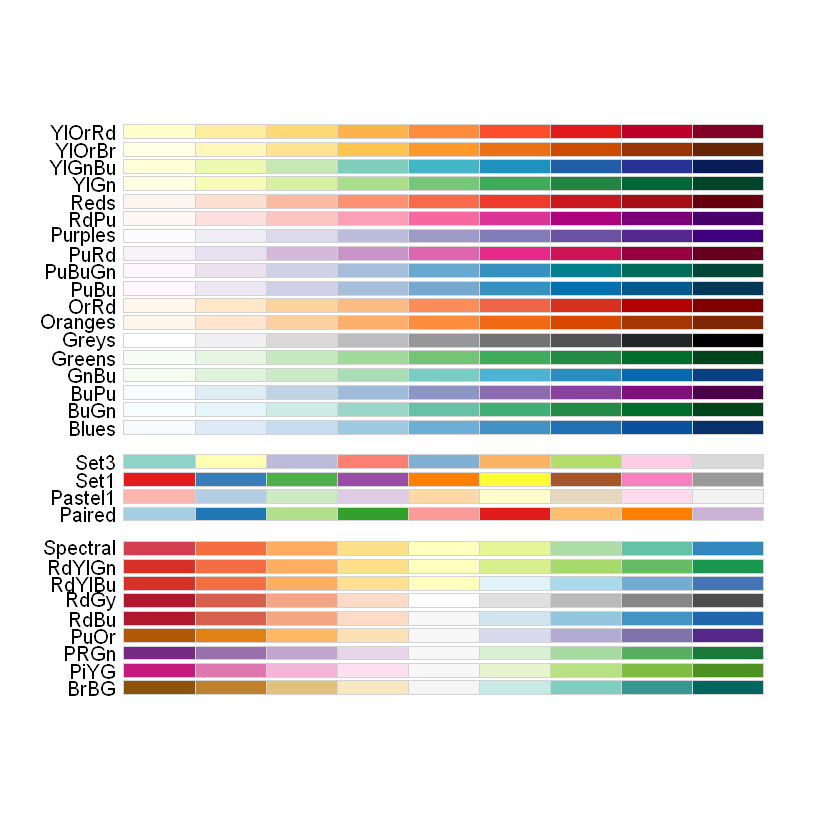

In [31]:
## --Plot the density of epression levels----
# RColorBrewer is a widely used package of color sets
# We want to asign a set of colors to our samples that are easy to distinguish
library(RColorBrewer)
nsamples <- ncol(x)
display.brewer.all(n=nsamples,type="all",exact.n=TRUE)
col <- brewer.pal(nsamples, "Paired")

In [32]:
# While ggplot uses a large set of nested functions,
# standard plotting in r uses the functions one at a time
# The next command lets the plotting device know that we want one row of plots with two columns
par(mfrow=c(1,2))

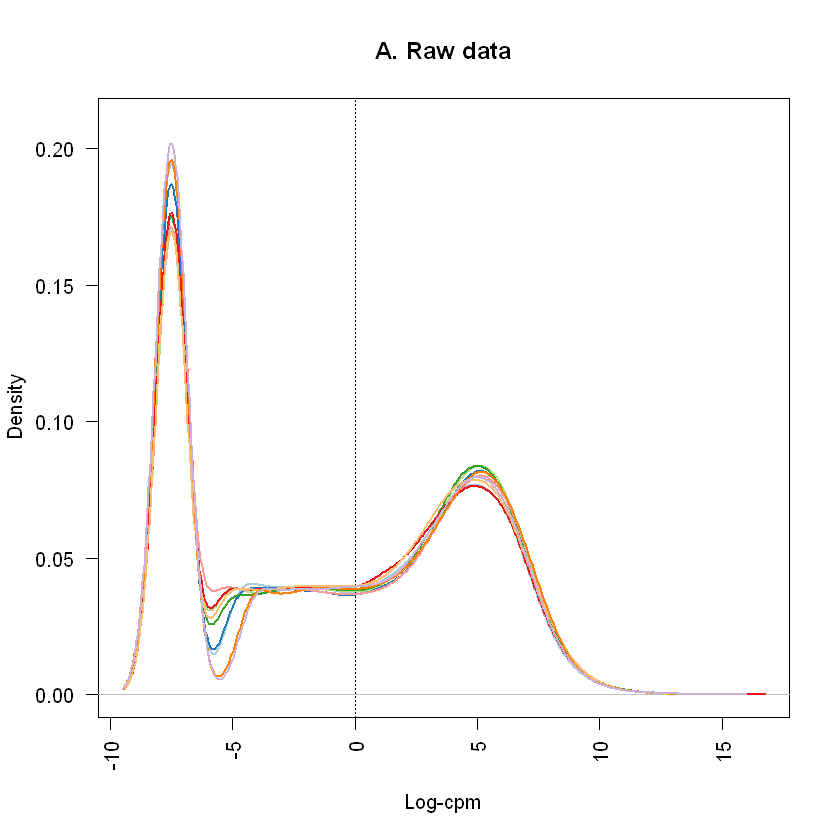

In [35]:
# You then plot the first sample's density before dropping low counts,
#   set the title, and drop a line at x=0
# Use ?plot to pull up a description of all the arguments you can pass plot
plot(density(lcpm.pre[,1]), 
                col=col[1],             #Color of what you're plotting, a density line here
                lwd=2,                  #line width
                ylim=c(0,0.21),         #limits of the y-axis
                las=2,                  #label style
                main="",                #plot() makes a simple title- we don't want it there 
                xlab="Log-cpm"          #x-axis label
)
title(main="A. Raw data")               #Set the title for this plot
abline(v=0, lty=3)                      #Drop a vertical line at x=0, type 3 (dashed)

#Now a quick for loop to add all the other density lines using the command lines()
#If you used plot() instead of lines() you would move to the second panel
for (i in 2:nsamples){
        den <- density(lcpm.pre[,i])
        lines(den$x, den$y, col=col[i], lwd=2)
}


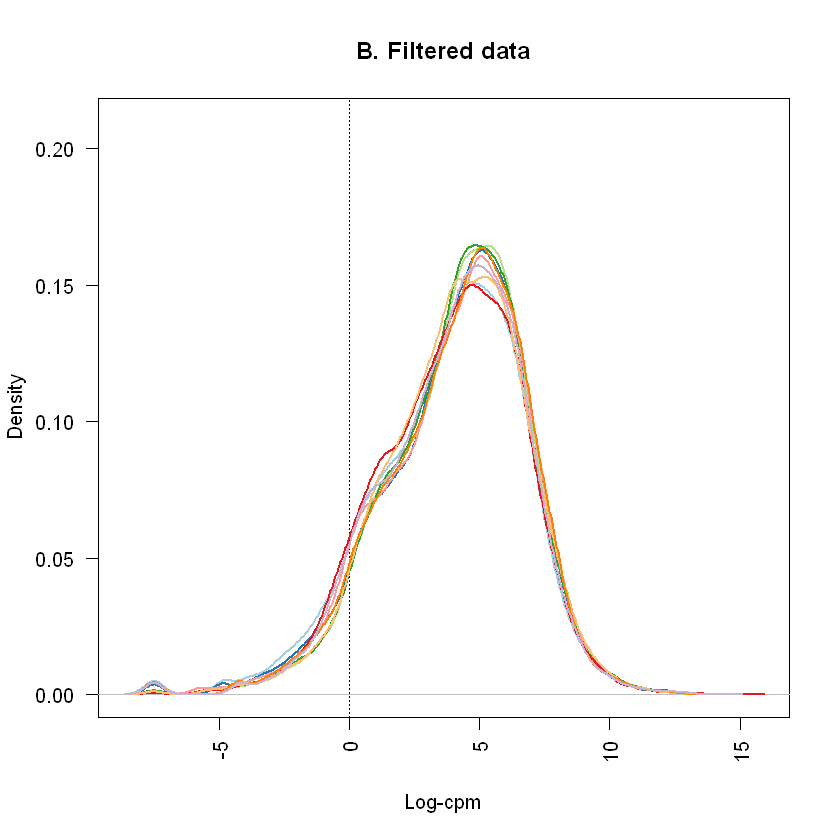

In [36]:
#Now do the same thing, but now we will look at the data after removing the low expression genes
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
        den <- density(lcpm[,i])
        lines(den$x, den$y, col=col[i], lwd=2)
}


In [37]:
## ---Now normalize using the trimmed mean of M values-----
# The TMM method makes the assumption that there are a small number of large fold changes.
# This method first calculates M values (fold changes, basically), sets aside the largest fold changes, and then normalizes the remaining genes
x <- calcNormFactors(x, method = "TMM")
x$samples
GroupColors = c(rep("green", sum(group== "LP")),rep("red", sum(group =="ML")),rep("blue", sum(group =="Basal")))

#These samples are very consistent, so the normalization factors are small

,files,group,lib.size,norm.factors,lane
10_6_5_11,GSM1545535_10_6_5_11.txt,LP,32832881,0.8957309,L004
9_6_5_11,GSM1545536_9_6_5_11.txt,ML,35296067,1.0349196,L004
purep53,GSM1545538_purep53.txt,Basal,57089259,1.0439552,L004
JMS8-2,GSM1545539_JMS8-2.txt,Basal,51304051,1.0405040,L006
JMS8-3,GSM1545540_JMS8-3.txt,ML,75724862,1.0323599,L006
JMS8-4,GSM1545541_JMS8-4.txt,LP,60457787,0.9223424,L006
JMS8-5,GSM1545542_JMS8-5.txt,Basal,55014064,0.9836603,L006
JMS9-P7c,GSM1545544_JMS9-P7c.txt,ML,21282257,1.0827381,L008
JMS9-P8c,GSM1545545_JMS9-P8c.txt,LP,19938942,0.9792607,L008


In [39]:
biocLite('gplots')

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'gplots'
also installing the dependencies 'gtools', 'gdata', 'caTools'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trusta\AppData\Local\Temp\RtmpWujgWV\downloaded_packages


Old packages: 'httpuv', 'MASS', 'quantmod', 'survival', 'xts'


Warning message:
"package 'gplots' was built under R version 3.5.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



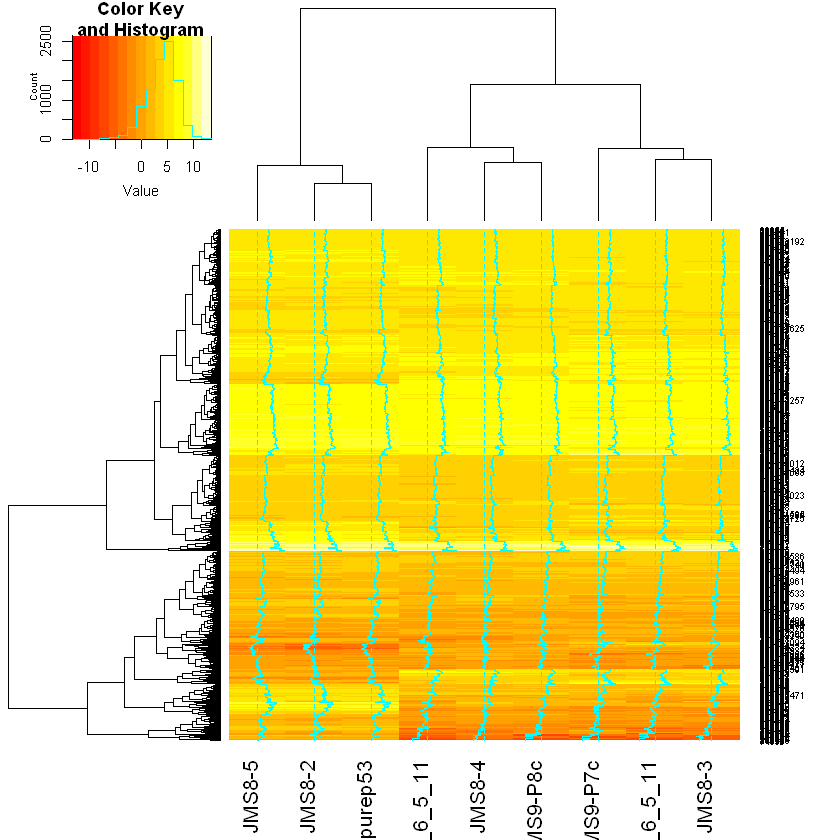

In [40]:
## --Sanity checks---------------
# The two best ways to see if your data is good quality and that you are asking the right questions
# are with heatmaps and some form of dimensional reduction like principal components or multi-dimensional scaling
# Let's make a simple heatmap first that we will use for homework
library(gplots)
heatmap.2(lcpm [1:1000,])

In [41]:
## Homework is to make this heatmap prettier- change the color scheme, remove the blue lines,
#  indicate which samples belong to each group and lane, remove the row labels.

In [42]:
######  End Day Two

In [43]:
## Linear models and differential expression

# In this section we will use linear modeling to predict each gene's expression in a condition
# given the expression in a condition you are comparing to. The model takes the data for all genes
# and comes up with a model that best fits the data. Then we use that model to look for genes that
# deviate from the model because they are differentially expressed in those two conditions.
# We will not dive deep under the hood of linear modeling as it's not needed for expression analysis.

In [44]:
## -Setting up design and contrast matrices-------------------------------

# The linear modelling commands we are about to use need to be told which 
# samples fall into each category and which categories we want to compare.
# These inputs need to be in the form of a matrix, and there is an R command for making each of them.


In [45]:
# First we make a design matrix that defines the categories for each sample.

design <- model.matrix(~0+group+lane)
design

groupBasal,groupLP,groupML,laneL006,laneL008
0,1,0,0,0
0,0,1,0,0
1,0,0,0,0
1,0,0,1,0
0,0,1,1,0
0,1,0,1,0
1,0,0,1,0
0,0,1,0,1
0,1,0,0,1


In [46]:
# The model.matrix () function makes names for the categories but we would like to replace them with simpler names.
# The function gsub () looks for a pattern of characters and replaces it with a different set of characters.
# Here we replace "group" with nothing ("")

#sample gsub()
st=state.name[1:5]
gsub("Al","ALLRIGHTY",st)
rm(st)

colnames(design) <- gsub("group", "", colnames(design))
design

[1] "ALLRIGHTYabama" "ALLRIGHTYaska"  "Arizona"        "Arkansas"      
[5] "California"

Basal,LP,ML,laneL006,laneL008
0,1,0,0,0
0,0,1,0,0
1,0,0,0,0
1,0,0,1,0
0,0,1,1,0
0,1,0,1,0
1,0,0,1,0
0,0,1,0,1
0,1,0,0,1


In [47]:
# Now we make a matrix that defines all of the comparisons we want to make.
# THis matrix depends on there being a design matrix.

contr.matrix <- makeContrasts(
  BasalvsLP = Basal-LP,              #the left half is a description, the right has the two categories to compare
  BasalvsML = Basal - ML,            #As always, extra spaces don't matter but do make it easier to read
  LPvsML = LP - ML, 
  levels = colnames(design))
contr.matrix

,BasalvsLP,BasalvsML,LPvsML
Basal,1,1,0
LP,-1,0,1
ML,0,-1,-1
laneL006,0,0,0
laneL008,0,0,0


In [48]:
## ----Heteroscedacity- variance is dependent on the amplitude
# We want to find significant expression changes, but if the 'noise' varies with expression we will get higher
# p-values the higher the gene is expressed. We will log transform the data, but that overcorrects and now
# genes with lower expression have higher variation (see the first plot we make). The voom () command generates
# weights for each gene based on the average read counts for that gene and puts them into the DGEList object.  
# We will make a plot of before and after those weights are applied.

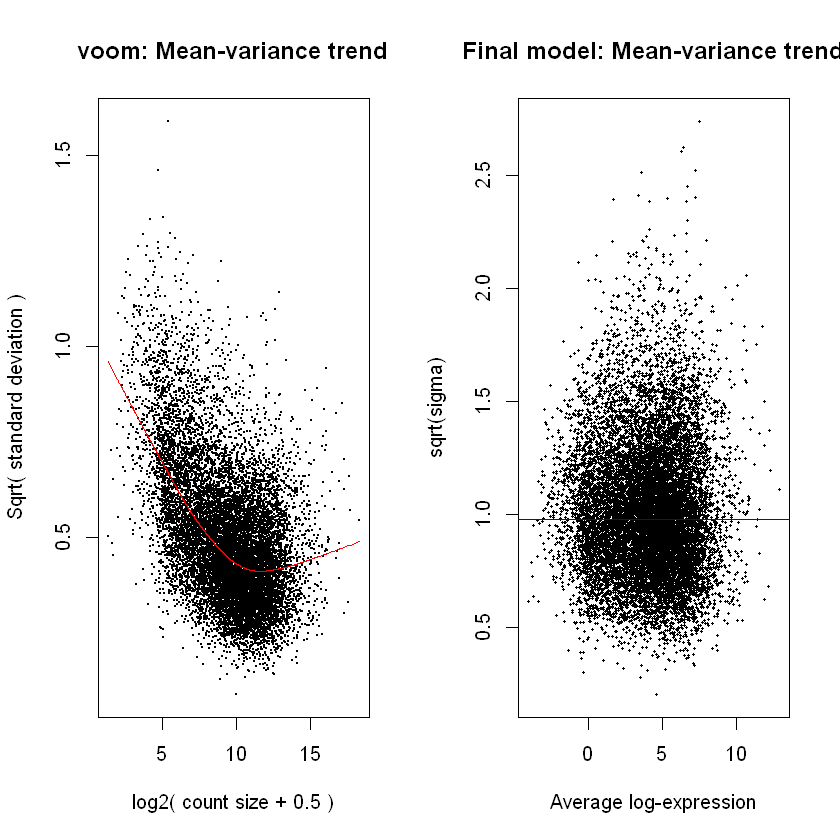

In [54]:
par(mfrow=c(1,2))                       # Set up side by side plots
v <- voom(x, design, plot=TRUE)         # Make an EList- a DGEList with weights to remove heteroscedacity and include the design matrix. 
vfit <- lmFit(v, design)                # This is what all of this has been building up to- estimate fold changes and standard errors by fitting to a linear model.
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)  # Then we make all the pairwise comparisons we put in our contrast matrix
efit <- eBayes(vfit)                    # And finally we use Emperical Bayes to borrow information from other genes to refine the standard error
plotSA(efit, main="Final model: Mean-variance trend") # Now we plot the final normalized 

In [55]:
# So how many genes are significantly induced or repressed?
# The command decideTests() tells you if a gene is induced (1), repressed (-1)
# or doesn't change (0) for each comparison. Default pvalue=0.5. pvalues are FDR corrected.
summary(decideTests(efit))

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

In [56]:
# The function treat() is the same as eBayes but includes a fold change requirement
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

       BasalvsLP BasalvsML LPvsML
Down        1417      1512    203
NotSig     11030     10895  13780
Up          1718      1758    182

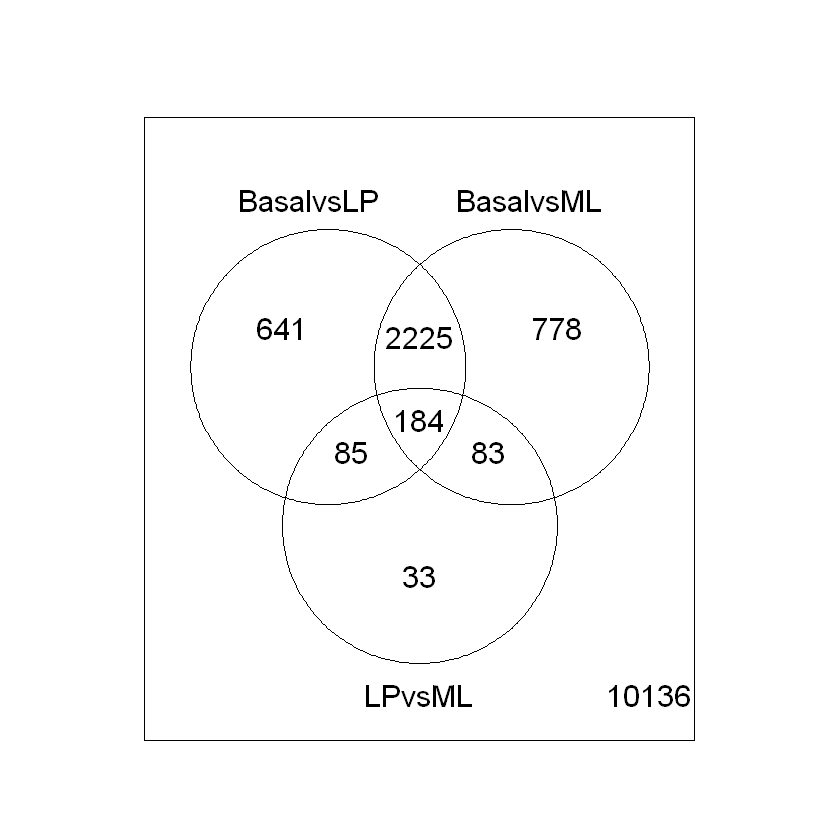

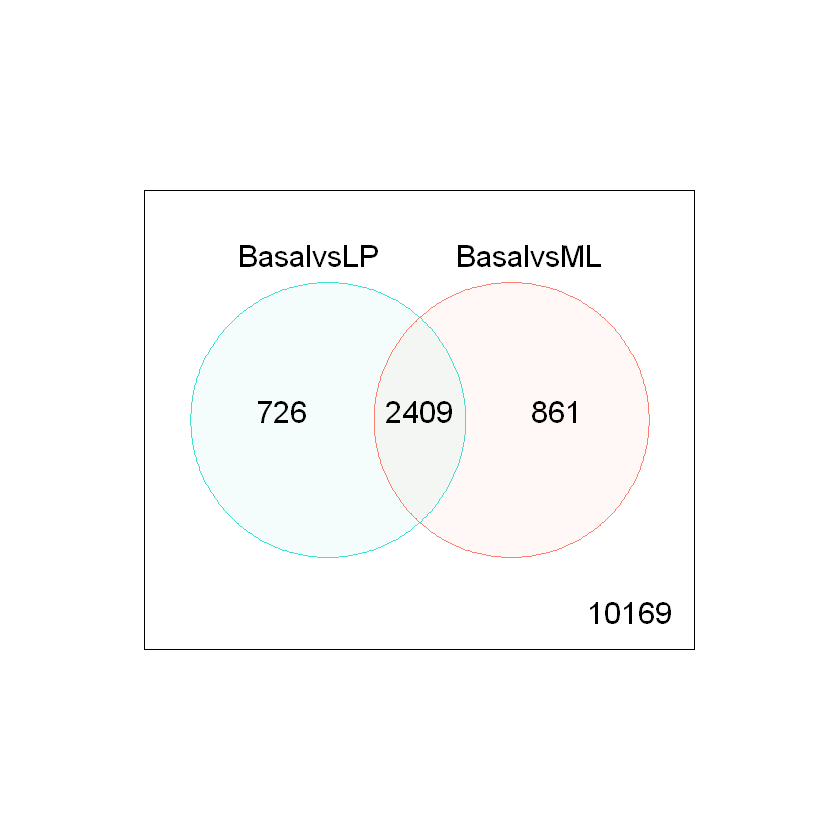

In [57]:
#Now let's make a Venn diagram to compare the DE gene sets
vennDiagram(dt)
vennDiagram(dt[,1:2], circle.col=c("turquoise", "salmon"))

In [58]:
# You can also export the results to a table...
basal.vs.lp <- topTreat(tfit, coef=1, n=Inf)
head(basal.vs.lp)
basal.vs.ml <- topTreat(tfit, coef=2, n=Inf, lfc=1, p.value=0.05)
head(basal.vs.ml)

,ENTREZID,EVIDENCE,ONTOLOGY,SYMBOL,TXCHROM,GOID,logFC,AveExpr,t,P.Value,adj.P.Val
12759,12759,ISO,BP,Clu,chr14,GO:0000902,-5.442877,8.857907,-33.44429,3.990899e-10,2.703871e-06
53624,53624,IEA,MF,Cldn7,chr11,GO:0005198,-5.514605,6.296762,-32.94533,4.503694e-10,2.703871e-06
242505,242505,IEA,MF,Rasef,chr4,GO:0000166,-5.921741,5.119585,-31.77625,6.063249e-10,2.703871e-06
67451,67451,ISO,BP,Pkp2,chr16,GO:0002159,-5.724823,4.420495,-30.65370,8.010456e-10,2.703871e-06
228543,228543,IEA,MF,Rhov,chr2,GO:0000166,-6.253427,5.486640,-29.46244,1.112729e-09,2.703871e-06
70350,70350,ISS,MF,Basp1,chr15,GO:0003714,-6.073297,5.248349,-28.64890,1.380545e-09,2.703871e-06


,ENTREZID,EVIDENCE,ONTOLOGY,SYMBOL,TXCHROM,GOID,logFC,AveExpr,t,P.Value,adj.P.Val
242505,242505,IEA,MF,Rasef,chr4,GO:0000166,-6.510470,5.119585,-35.49093,2.573575e-10,1.915485e-06
53624,53624,IEA,MF,Cldn7,chr11,GO:0005198,-5.469160,6.296762,-32.52520,4.978446e-10,1.915485e-06
12521,12521,IBA,CC,Cd82,chr2,GO:0005887,-4.667737,7.070963,-31.82187,5.796191e-10,1.915485e-06
71740,71740,IBA,MF,Nectin4,chr1,GO:0004872,-5.556046,5.166292,-31.29987,6.760578e-10,1.915485e-06
20661,20661,IEA,BP,Sort1,chr3,GO:0001503,-4.908119,6.705784,-31.23083,6.761331e-10,1.915485e-06
15375,15375,IMP,BP,Foxa1,chr12,GO:0000122,-5.753884,5.625064,-28.34612,1.487280e-09,2.281914e-06


In [59]:
write.table (basal.vs.lp, file="basalVSlp.txt", sep = "\t", row.names = FALSE)

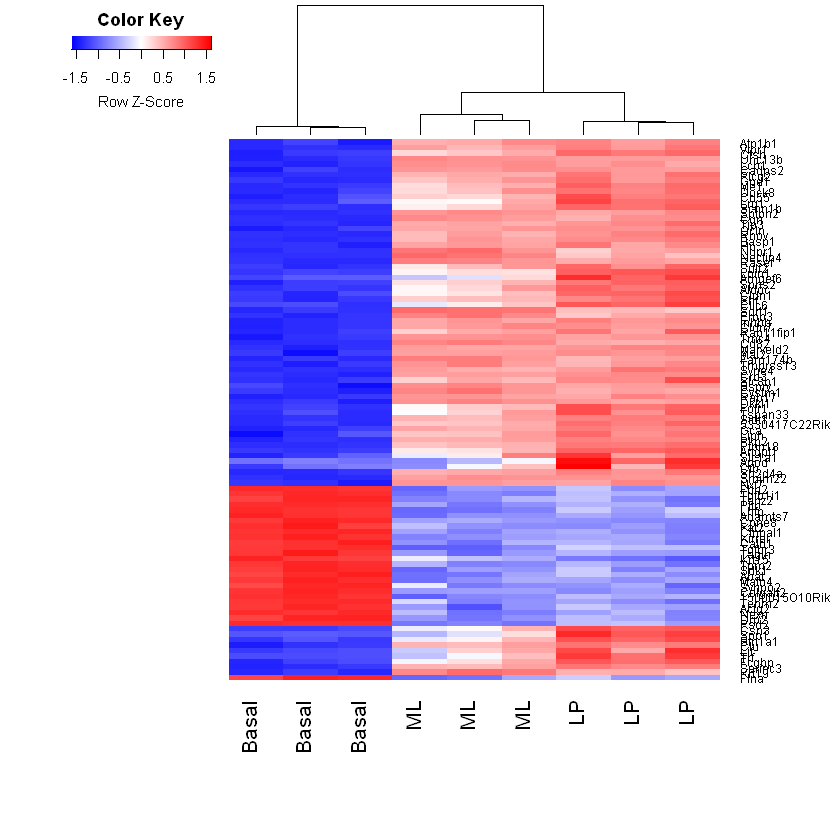

In [60]:
#Finally, we will take the top hits and generate a heatmap as a final output
library(gplots)
basal.vs.lp <- topTreat(tfit, coef=1, n=Inf)
basal.vs.lp.topgenes <- basal.vs.lp$ENTREZID[1:100]
i <- which(v$genes$ENTREZID %in% basal.vs.lp.topgenes)
mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
          labRow=v$genes$SYMBOL[i], labCol=group, 
          col=mycol, trace="none", density.info="none", 
          margin=c(8,6), lhei=c(2,10), dendrogram="column")